## ASSIGNMENT TWO

In [1]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Fashion MNIST dataset downloaded successfully.")
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")

2025-04-03 17:42:58.334589: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-03 17:42:59.070123: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743694979.328165   56140 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743694979.415279   56140 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743694979.936898   56140 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Fashion MNIST dataset downloaded successfully.
Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


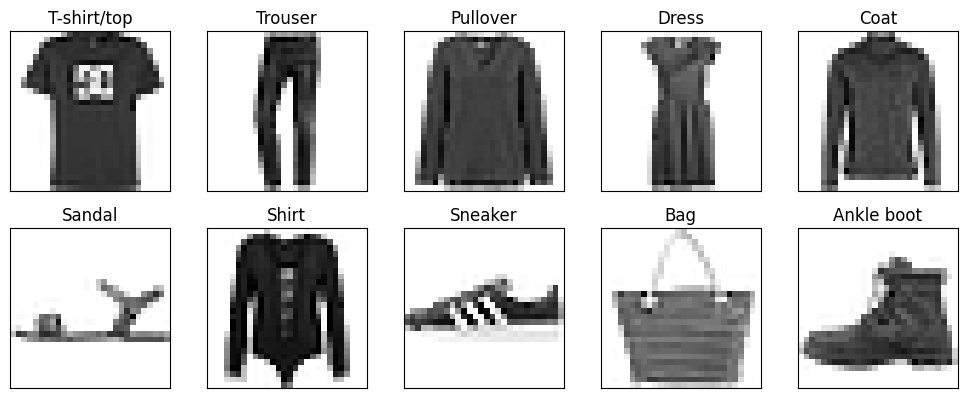

In [2]:
import numpy as np

import matplotlib.pyplot as plt

# Define the class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create a figure for the panel of plots
plt.figure(figsize=(10, 10))

# Loop through each class and plot one random example
for i in range(10):
    # Find all indices of the current class
    class_indices = np.where(y_train == i)[0]
    
    # Select a random index for the current class
    random_index = np.random.choice(class_indices)
    
    # Add a subplot for the current class
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # Display the image and set the title
    plt.imshow(x_train[random_index], cmap=plt.cm.binary)
    plt.title(class_names[i])

# Show the panel of plots
plt.tight_layout()
plt.show()

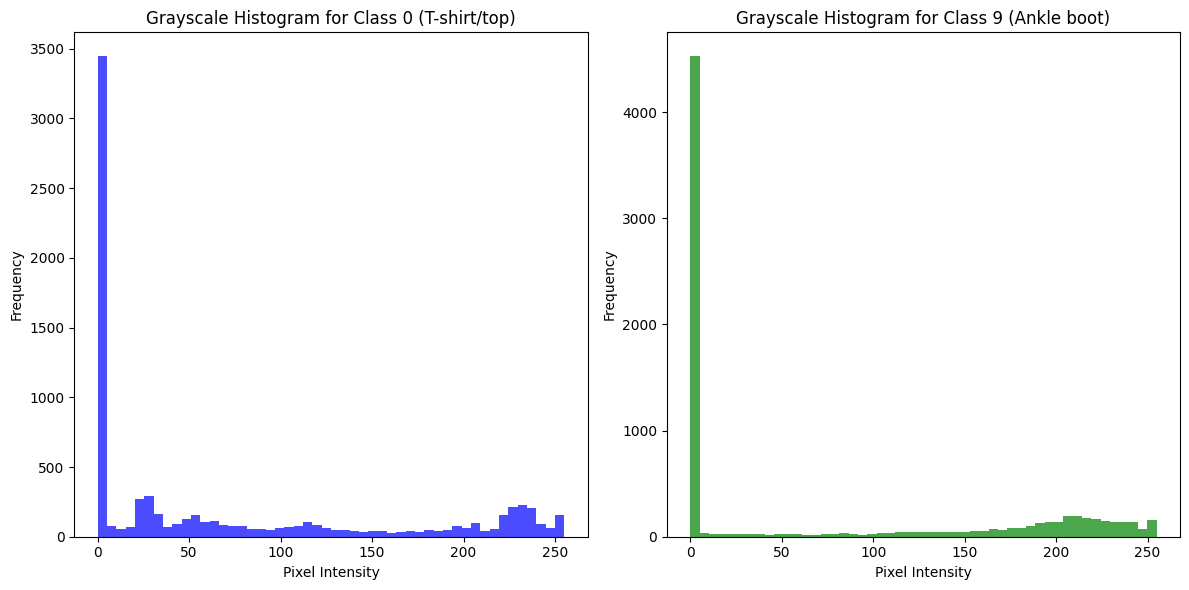

In [3]:
# Select two classes
class_1 = 0  # T-shirt/top
class_2 = 9  # Ankle boot

# Initialize lists to store grayscale values for each class
grayscale_values_class_1 = []
grayscale_values_class_2 = []

# Select 10 random images for each class
for _ in range(10):
    # Randomly select an image for class_1
    random_index_class_1 = np.random.choice(np.where(y_train == class_1)[0])
    grayscale_values_class_1.extend(x_train[random_index_class_1].flatten())
    
    # Randomly select an image for class_2
    random_index_class_2 = np.random.choice(np.where(y_train == class_2)[0])
    grayscale_values_class_2.extend(x_train[random_index_class_2].flatten())

# Create a panel of 2 histograms
plt.figure(figsize=(12, 6))

# Histogram for class_1
plt.subplot(1, 2, 1)
plt.hist(grayscale_values_class_1, bins=50, color='blue', alpha=0.7)
plt.title(f'Grayscale Histogram for Class {class_1} ({class_names[class_1]})')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Histogram for class_2
plt.subplot(1, 2, 2)
plt.hist(grayscale_values_class_2, bins=50, color='green', alpha=0.7)
plt.title(f'Grayscale Histogram for Class {class_2} ({class_names[class_2]})')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Show the histograms
plt.tight_layout()
plt.show()

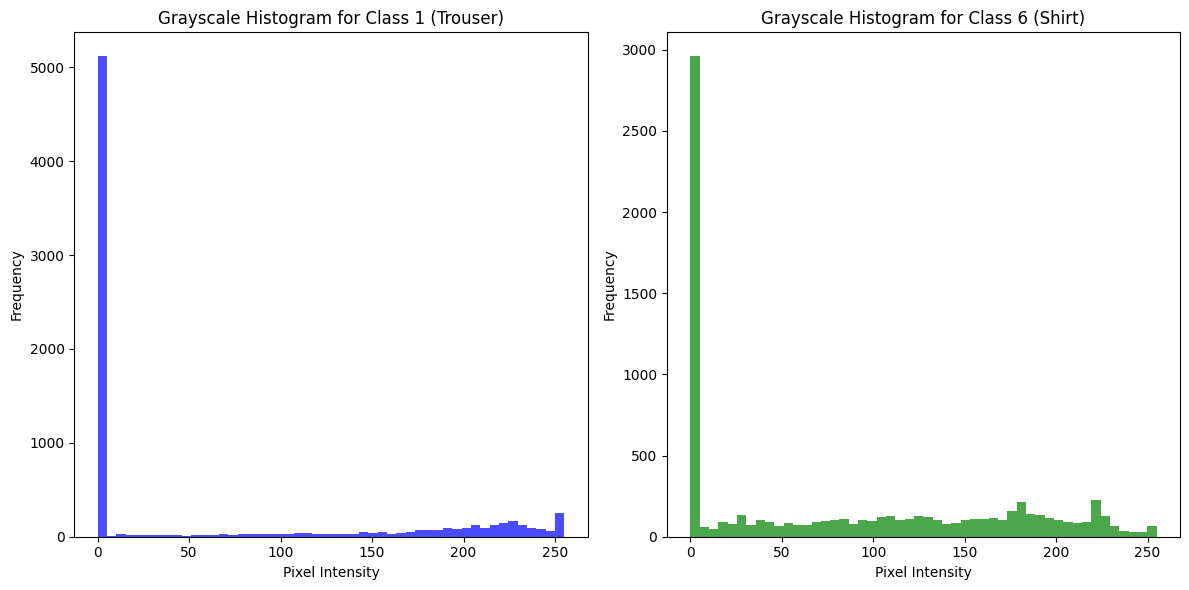

In [4]:
# Select two classes
class_1 = 1  # T-shirt/top
class_2 = 6  # Ankle boot

# Initialize lists to store grayscale values for each class
grayscale_values_class_1 = []
grayscale_values_class_2 = []

# Select 10 random images for each class
for _ in range(10):
    # Randomly select an image for class_1
    random_index_class_1 = np.random.choice(np.where(y_train == class_1)[0])
    grayscale_values_class_1.extend(x_train[random_index_class_1].flatten())
    
    # Randomly select an image for class_2
    random_index_class_2 = np.random.choice(np.where(y_train == class_2)[0])
    grayscale_values_class_2.extend(x_train[random_index_class_2].flatten())

# Create a panel of 2 histograms
plt.figure(figsize=(12, 6))

# Histogram for class_1
plt.subplot(1, 2, 1)
plt.hist(grayscale_values_class_1, bins=50, color='blue', alpha=0.7)
plt.title(f'Grayscale Histogram for Class {class_1} ({class_names[class_1]})')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Histogram for class_2
plt.subplot(1, 2, 2)
plt.hist(grayscale_values_class_2, bins=50, color='green', alpha=0.7)
plt.title(f'Grayscale Histogram for Class {class_2} ({class_names[class_2]})')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Show the histograms
plt.tight_layout()
plt.show()

In [5]:
# Flatten the input data
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# Normalize the pixel values
x_train_normalized = x_train_flattened / 255.0
x_test_normalized = x_test_flattened / 255.0

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train_normalized.shape[1],)),  # Hidden layer with 128 neurons
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each class)
])

# Compile the model
model.compile(optimizer='adam',  # Optimization algorithm
              loss='sparse_categorical_crossentropy',  # Loss function
              metrics=['accuracy'])  # Metric to monitor

# Train the model
history = model.fit(x_train_normalized, y_train, epochs=10, batch_size=32, validation_data=(x_test_normalized, y_test))

# Display the model summary
model.summary()

/home/kip/projects/ADL/ADLEnv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1743695018.484473   56140 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7755 - loss: 0.6359 - val_accuracy: 0.8403 - val_loss: 0.4302
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8647 - loss: 0.3700 - val_accuracy: 0.8550 - val_loss: 0.4058
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8786 - loss: 0.3327 - val_accuracy: 0.8593 - val_loss: 0.3979
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8860 - loss: 0.3089 - val_accuracy: 0.8726 - val_loss: 0.3608
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8923 - loss: 0.2904 - val_accuracy: 0.8771 - val_loss: 0.3439
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8969 - loss: 0.2757 - val_accuracy: 0.8807 - val_loss: 0.3364
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9018 - loss: 0.2629 - val_accuracy: 0.8740 - val_loss: 0.3477
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9060 - loss: 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

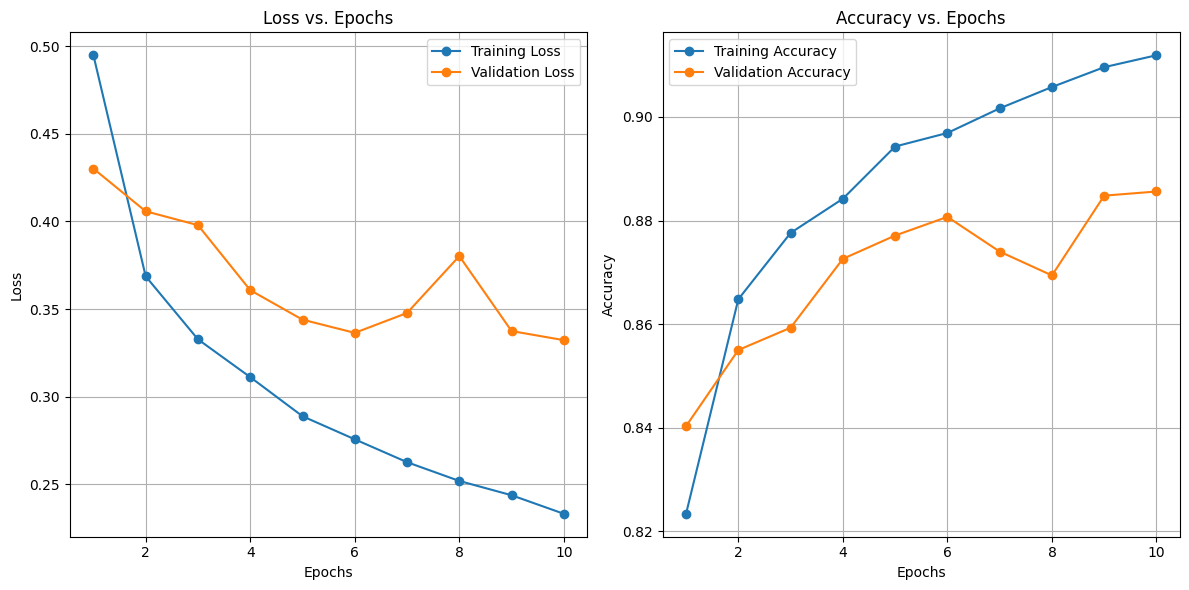

In [7]:
# Extract training and validation metrics from the history object
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a figure for the plots
plt.figure(figsize=(12, 6))

# Plot loss values
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot accuracy values
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
    
# Show the plots
plt.tight_layout()
plt.show()

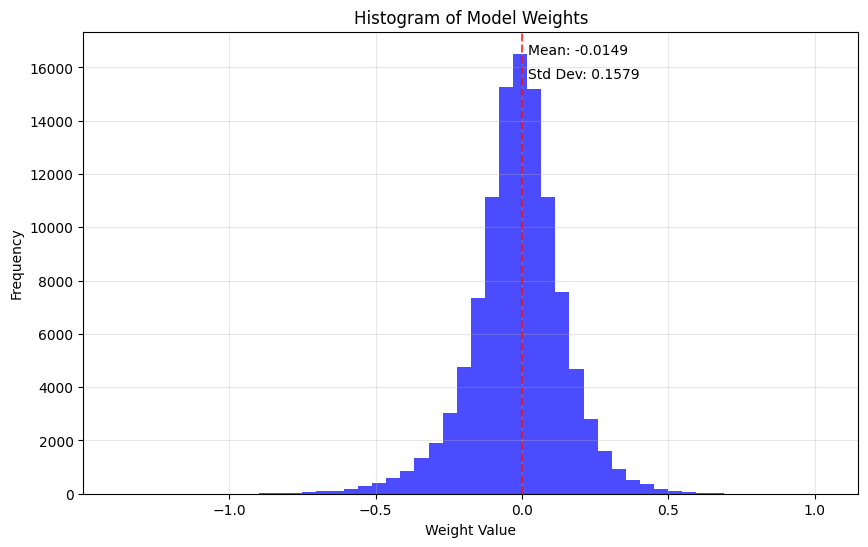

Weight Statistics:
Min: -1.3787
Max: 1.0287
Mean: -0.0149
Median: -0.0096
Standard Deviation: 0.1579
Total number of weights: 109184


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Extract all weights from the model
weights = []
for layer in model.layers:
    layer_weights = layer.get_weights()
    if layer_weights:  # Check if the layer has weights
        # The first element contains the weights, the second contains biases
        weights.append(layer_weights[0].flatten())

# Concatenate all weights into a single array
all_weights = np.concatenate(weights)

# Plot histogram of weights
plt.figure(figsize=(10, 6))
plt.hist(all_weights, bins=50, alpha=0.7, color='blue')
plt.title('Histogram of Model Weights')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)  # Add line at x=0
plt.text(0.02, plt.gca().get_ylim()[1]*0.95, f'Mean: {all_weights.mean():.4f}')
plt.text(0.02, plt.gca().get_ylim()[1]*0.9, f'Std Dev: {all_weights.std():.4f}')
plt.show()

# Print summary statistics
print(f"Weight Statistics:")
print(f"Min: {all_weights.min():.4f}")
print(f"Max: {all_weights.max():.4f}")
print(f"Mean: {all_weights.mean():.4f}")
print(f"Median: {np.median(all_weights):.4f}")
print(f"Standard Deviation: {all_weights.std():.4f}")
print(f"Total number of weights: {len(all_weights)}")

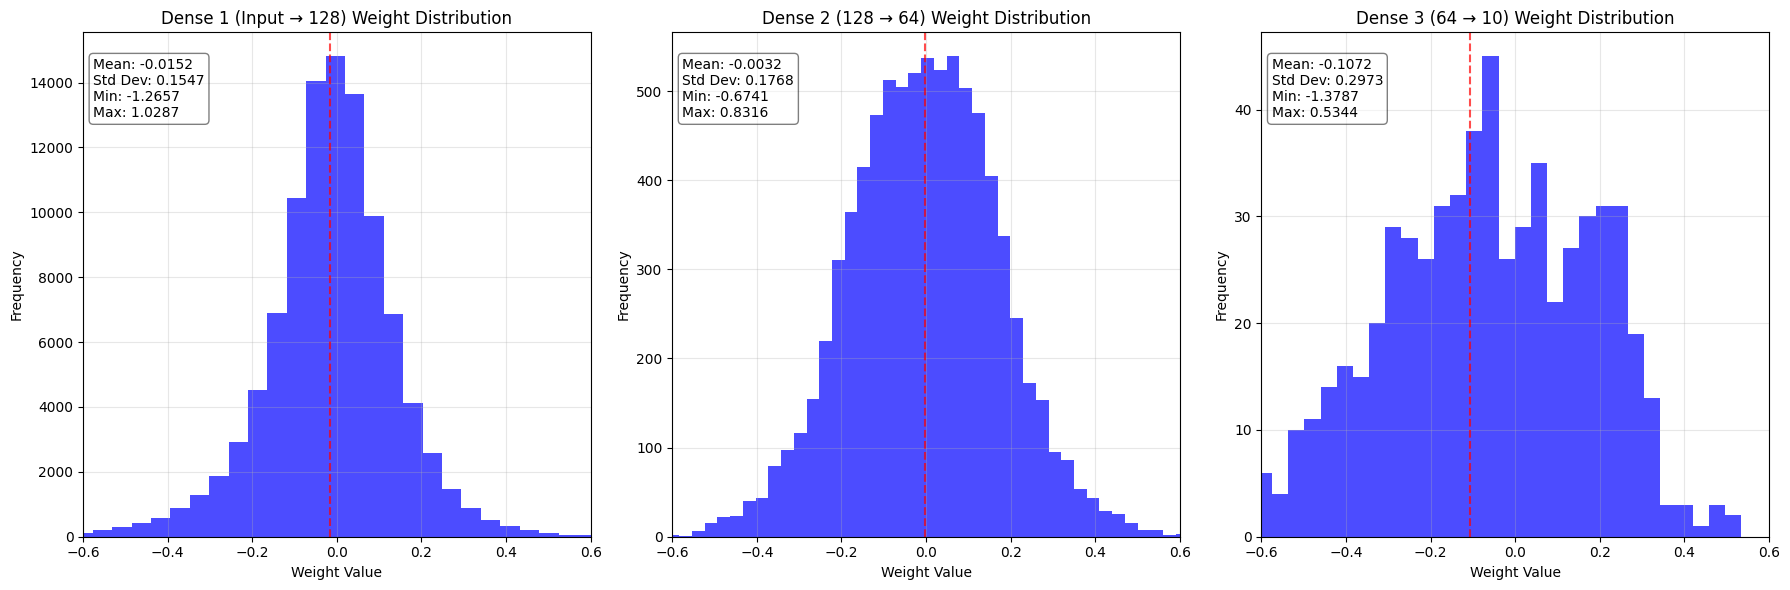

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure with side-by-side subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
layer_names = ["Dense 1 (Input → 128)", "Dense 2 (128 → 64)", "Dense 3 (64 → 10)"]

# Extract and plot weights for each layer
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()[0].flatten()  # Just the weights, not biases
    
    # Calculate statistics
    mean = weights.mean()
    std = weights.std()
    min_val = weights.min()
    max_val = weights.max()
    
    # Plot histogram
    axs[i].hist(weights, bins=50, alpha=0.7, color='blue')
    axs[i].set_title(f'{layer_names[i]} Weight Distribution')
    axs[i].set_xlabel('Weight Value')
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True, alpha=0.3)
    axs[i].set_xlim(-0.6, 0.6)  # Consistent x-axis for comparison
    
    # Add vertical line at mean
    axs[i].axvline(x=mean, color='red', linestyle='--', alpha=0.7)
    
    # Add statistics as text
    stats_text = f'Mean: {mean:.4f}\nStd Dev: {std:.4f}\nMin: {min_val:.4f}\nMax: {max_val:.4f}'
    axs[i].text(0.02, 0.95, stats_text, transform=axs[i].transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7533 - loss: 1.5421 - val_accuracy: 0.7857 - val_loss: 0.7810
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8055 - loss: 0.7264 - val_accuracy: 0.7995 - val_loss: 0.7119
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8178 - loss: 0.6660 - val_accuracy: 0.8201 - val_loss: 0.6495
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8250 - loss: 0.6311 - val_accuracy: 0.8153 - val_loss: 0.6476
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8329 - loss: 0.6033 - val_accuracy: 0.8275 - val_loss: 0.6124
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8318 - loss: 0.5887 - val_accuracy: 0.8318 - val_loss: 0.5839
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8327 - loss: 0.5763 - val_accuracy: 0.8294 - val_loss: 0.5839
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8350 - loss:

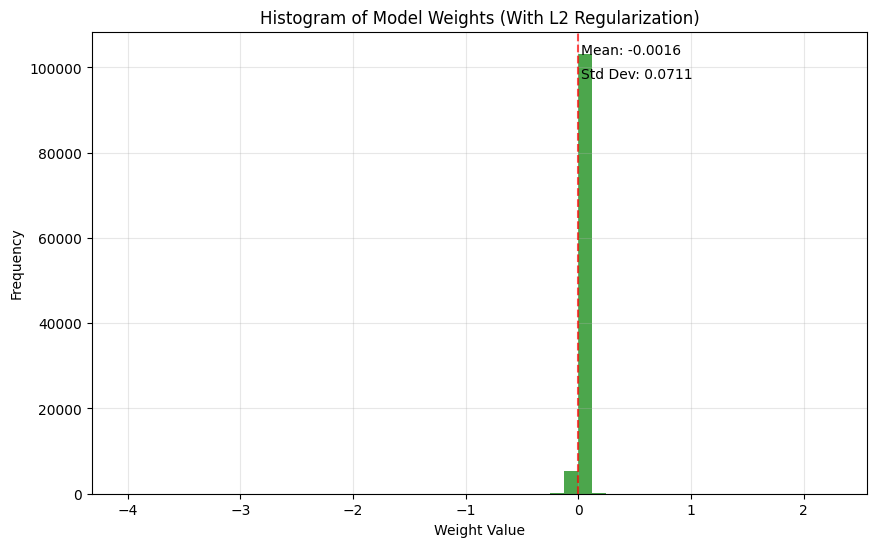

In [11]:
# Define a new model with L2 regularization
regularized_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', 
                         input_shape=(x_train_normalized.shape[1],),
                         kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # L2 regularization
    tf.keras.layers.Dense(64, activation='relu',
                         kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # L2 regularization
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer
])

# Compile the model
regularized_model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

# Train the model
history_reg = regularized_model.fit(x_train_normalized, y_train, 
                                   epochs=10, batch_size=32, 
                                   validation_data=(x_test_normalized, y_test))

# Extract all weights from the regularized model
weights_reg = []
for layer in regularized_model.layers:
    layer_weights = layer.get_weights()
    if layer_weights:
        weights_reg.append(layer_weights[0].flatten())

# Concatenate all weights into a single array
all_weights_reg = np.concatenate(weights_reg)

# Plot histogram of weights
plt.figure(figsize=(10, 6))
plt.hist(all_weights_reg, bins=50, alpha=0.7, color='green')
plt.title('Histogram of Model Weights (With L2 Regularization)')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)
plt.text(0.02, plt.gca().get_ylim()[1]*0.95, f'Mean: {all_weights_reg.mean():.4f}')
plt.text(0.02, plt.gca().get_ylim()[1]*0.9, f'Std Dev: {all_weights_reg.std():.4f}')
plt.show()

Training untuned model...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7741 - loss: 0.6367 - val_accuracy: 0.8487 - val_loss: 0.4171
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8635 - loss: 0.3780 - val_accuracy: 0.8597 - val_loss: 0.3917
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8779 - loss: 0.3340 - val_accuracy: 0.8734 - val_loss: 0.3535
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8858 - loss: 0.3087 - val_accuracy: 0.8681 - val_loss: 0.3793
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8903 - loss: 0.2952 - val_accuracy: 0.8744 - val_loss: 0.3394
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8948 - loss: 0.2808 - val_accuracy: 0.8722 - val_loss: 0.3620
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8987 - loss: 0.2675 - val_accuracy: 0.8803 - val_loss: 0.3417
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - 

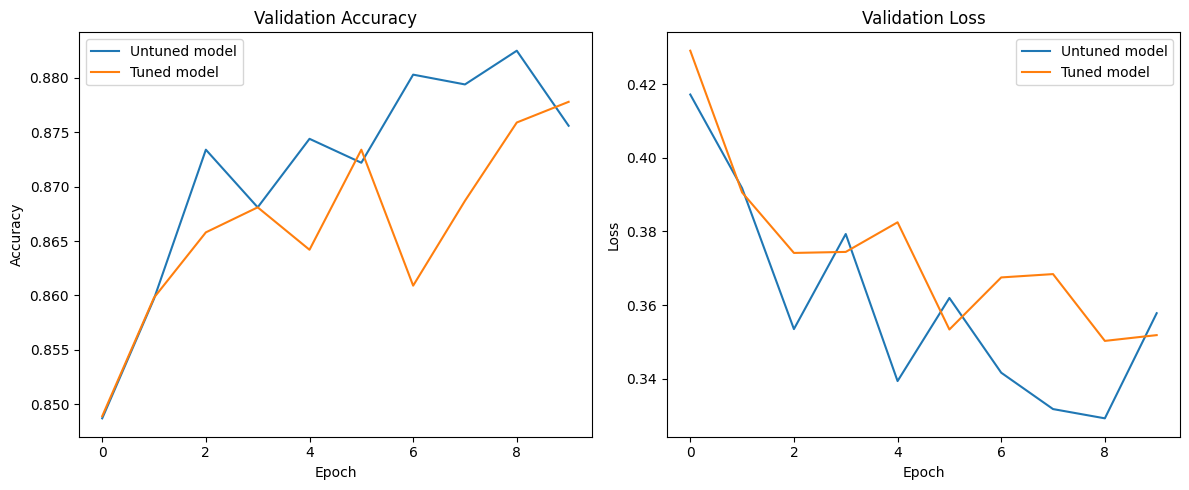

Untuned model - Test accuracy: 0.8756, Test loss: 0.3578
Tuned model - Test accuracy: 0.8778, Test loss: 0.3519
Improvement: 0.22%

Top 5 hyperparameter combinations:
    hidden1_units  hidden2_units  learning_rate  l2_regularization  \
4              64             32          0.001                0.0   
28            128             64          0.001                0.0   
13             64             64          0.001                0.0   
20            128             32          0.001                0.0   
5              64             32          0.001                0.0   

    dropout_rate  val_accuracy  val_loss  
4            0.0        0.8338  0.476037  
28           0.0        0.8332  0.472016  
13           0.2        0.8306  0.472369  
20           0.0        0.8305  0.488574  
5            0.2        0.8237  0.492454  


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train_flat = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test_flat = x_test.reshape(x_test.shape[0], -1) / 255.0

# Function to create model with variable hyperparameters
def create_model(hidden1_units=128, hidden2_units=64, learning_rate=0.001, 
                 l2_regularization=0.0, dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(hidden1_units, activation='relu', 
                   kernel_regularizer=tf.keras.regularizers.l2(l2_regularization),
                   input_shape=(784,)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(hidden2_units, activation='relu',
                   kernel_regularizer=tf.keras.regularizers.l2(l2_regularization)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

# Untuned baseline model (same as your original model)
print("Training untuned model...")
untuned_model = create_model()
untuned_history = untuned_model.fit(
    x_train_flat, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test_flat, y_test),
    verbose=1
)

# Define hyperparameter grid (simplified for faster execution)
param_grid = {
    'hidden1_units': [64, 128],
    'hidden2_units': [32, 64],
    'learning_rate': [0.01, 0.001],
    'l2_regularization': [0.0, 0.01],
    'dropout_rate': [0.0, 0.2]
}

# Manual grid search (simpler but less efficient than GridSearchCV)
results = []
best_val_acc = 0
best_params = {}

# Generate all combinations of parameters
param_combinations = list(itertools.product(
    param_grid['hidden1_units'],
    param_grid['hidden2_units'],
    param_grid['learning_rate'],
    param_grid['l2_regularization'],
    param_grid['dropout_rate']
))

print(f"Testing {len(param_combinations)} hyperparameter combinations...")

# Use a subset of training data for faster tuning
train_subset_size = 10000  # Adjust based on your computational resources
indices = np.random.choice(len(x_train_flat), train_subset_size, replace=False)
x_subset = x_train_flat[indices]
y_subset = y_train[indices]

for i, (h1, h2, lr, l2, dr) in enumerate(param_combinations):
    print(f"Combination {i+1}/{len(param_combinations)}: h1={h1}, h2={h2}, lr={lr}, l2={l2}, dr={dr}")
    
    # Create and train model with current hyperparameters
    model = create_model(
        hidden1_units=h1,
        hidden2_units=h2,
        learning_rate=lr,
        l2_regularization=l2,
        dropout_rate=dr
    )
    
    history = model.fit(
        x_subset, y_subset,
        epochs=5,  # Fewer epochs for faster tuning
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )
    
    # Evaluate on validation data
    val_loss, val_acc = model.evaluate(x_test_flat, y_test, verbose=0)
    
    results.append({
        'hidden1_units': h1,
        'hidden2_units': h2,
        'learning_rate': lr,
        'l2_regularization': l2,
        'dropout_rate': dr,
        'val_accuracy': val_acc,
        'val_loss': val_loss
    })
    
    # Update best parameters
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_params = {
            'hidden1_units': h1,
            'hidden2_units': h2,
            'learning_rate': lr,
            'l2_regularization': l2,
            'dropout_rate': dr
        }

print("Best parameters:", best_params)
print(f"Best validation accuracy: {best_val_acc:.4f}")

# Create tuned model with best hyperparameters
print("Training final tuned model with best parameters...")
tuned_model = create_model(
    hidden1_units=best_params['hidden1_units'],
    hidden2_units=best_params['hidden2_units'],
    learning_rate=best_params['learning_rate'],
    l2_regularization=best_params['l2_regularization'],
    dropout_rate=best_params['dropout_rate']
)

# Train the tuned model
tuned_history = tuned_model.fit(
    x_train_flat, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test_flat, y_test),
    verbose=1
)

# Compare performance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(untuned_history.history['val_accuracy'], label='Untuned model')
plt.plot(tuned_history.history['val_accuracy'], label='Tuned model')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(untuned_history.history['val_loss'], label='Untuned model')
plt.plot(tuned_history.history['val_loss'], label='Tuned model')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Final evaluation
untuned_loss, untuned_acc = untuned_model.evaluate(x_test_flat, y_test, verbose=0)
tuned_loss, tuned_acc = tuned_model.evaluate(x_test_flat, y_test, verbose=0)

print(f"Untuned model - Test accuracy: {untuned_acc:.4f}, Test loss: {untuned_loss:.4f}")
print(f"Tuned model - Test accuracy: {tuned_acc:.4f}, Test loss: {tuned_loss:.4f}")
print(f"Improvement: {(tuned_acc - untuned_acc) * 100:.2f}%")

# Create a results dataframe for better visualization
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='val_accuracy', ascending=False)
print("\nTop 5 hyperparameter combinations:")
print(results_df.head(5))